In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
np.random.rand()
df = pd.DataFrame({'x1': [3] , 'x2': [2], 'y': [8]})
df.head()

,x1,x2,y
0,3,2,8


In [2]:
## Initilize the values:-
m1, m2, c= 0, 0, 0

In [3]:
y_pred = m1*df['x1'] + m2*df['x2'] + c
y_pred

0    0
dtype: int64

In [4]:
def update_weights(m1, m2, c, X1,X2, Y, learning_rate, y_pred):
    m1_deriv, m2_deriv, c_deriv = 0 , 0, 0 
    N = len(X1)
    for i in range(N):
        # loss_function = 1/N sum(1->N)(y_real - pred)
        # Calculate partial derivatives
        # -2x(y - (mx + b))
        loss = df['y'] - y_pred
        m1_deriv += -2*X1[i] * (Y[i] - (m1*X1[i]+m2*X2[i] + c))
        m2_deriv += -2*X2[i] * (Y[i] - (m1*X1[i]+m2*X2[i] + c))
        #print(m1_deriv, m2_deriv)
        
        # -2(y - (mx + b))
        c_deriv += -2*(Y[i] - (m1*X1[i]+m2*X2[i] + c))
       

    # We subtract because the derivatives point in direction of steepest ascent
    m1 -= (m1_deriv / float(N)) * learning_rate
    m2 -= (m2_deriv / float(N)) * learning_rate
    c -= (c_deriv / float(N)) * learning_rate

    return m1, m2, c, y_pred, loss

In [8]:
m1_list, m2_list, c_list = [], [], []
for i in range(0,200):
    m1, m2, c, y_pred, loss = update_weights(m1 ,m2, c, df['x1'], df['x2'], df['y'],0.05, y_pred)
    m1_list.append(m1)
    m2_list.append(m2)
    c_list.append(c)
    m1, m2, c = m1, m2, c


In [9]:
m1_list

[4.2151560634070814e+222,
 -1.6860624253628326e+222,
 6.744249701451343e+221,
 -2.6976998805805282e+221,
 1.079079952232222e+221,
 -4.3163198089287807e+220,
 1.7265279235716212e+220,
 -6.906111694285399e+219,
 2.7624446777152463e+219,
 -1.1049778710850131e+219,
 4.419911484350912e+218,
 -1.7679645937295066e+218,
 7.071858375026609e+217,
 -2.8287433499020636e+217,
 1.1314973400694057e+217,
 -4.5259893591918233e+216,
 1.8103957447625286e+216,
 -7.241582968192124e+215,
 2.8966331981348403e+215,
 -1.158653268395945e+215,
 4.634613182163691e+214,
 -1.8538451642855664e+214,
 7.415381742941367e+213,
 -2.966151611377444e+213,
 1.1864617303500808e+213,
 -4.745836063409288e+212,
 1.8983452833547493e+212,
 -7.593272553508658e+211,
 3.0374176013138007e+211,
 -1.2148584606151832e+211,
 4.8605196415641094e+210,
 -1.9431220575222675e+210,
 7.78334622112284e+209,
 -3.1024804974153683e+209,
 1.2518501899999153e+209,
 -4.8988208496619835e+208,
 2.0681082502024703e+208,
 -7.186633897433116e+207,
 3.96045

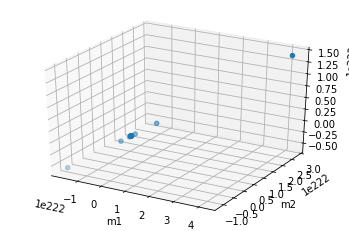

In [10]:
import matplotlib.pyplot as plt

from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')

xline = m1_list
yline = m2_list
zline = c_list

plt.xlabel('m1')
plt.ylabel('m2')

ax.scatter3D(xline, yline, zline, 'gray')

## for n=20 nu. of data points:-

In [38]:
df = pd.DataFrame({'x1': np.random.rand(20), 'x2': np.arange(0,20), 'y': np.random.rand(20)})
df.head()

,x1,x2,y
0,0.798014,0,0.981742
1,0.825969,1,0.159033
2,0.502110,2,0.430791
3,0.566986,3,0.497880
4,0.018352,4,0.624797


In [98]:
def update_weights(m1, m2, c, X1,X2, Y, y_pred_for_iteration, loss_list, learning_rate):
    
    m1_deriv, m2_deriv, c_deriv = 0 , 0, 0 
    N = len(X1)
    loss = 0
    y_pred = []
    
    for i in range(N):
        
        pred = m1*X1[i]+m2*X2[i] + c
        
        ## for every data point:-
        y_pred.append(pred)

        loss += Y[i] - (pred)
        m1_deriv += -2*X1[i] * (Y[i] - (pred))
        m2_deriv += -2*X2[i] * (Y[i] - (pred))
        c_deriv += -2*(Y[i] - (pred))
       
    m1_deriv += m1_deriv/N
    m2_deriv += m2_deriv/N
    c_deriv += c_deriv/N
    loss_list.append(loss/N)
    y_pred_for_iteration.append(y_pred)
    # We subtract because the derivatives point in direction of steepest ascent
    m1 -= (m1_deriv / float(N)) * learning_rate
    m2 -= (m2_deriv / float(N)) * learning_rate
    c -= (c_deriv / float(N)) * learning_rate

    return m1, m2, c, y_pred, loss

In [99]:
m1_list, m2_list, c_list, y_pred_for_iteration, loss_list = [], [], [], [], []
m1, m2, c= 0, 0, 0
for i in range(0,200):
        m1, m2, c, y_pred, loss = update_weights(m1 ,m2, c, X1, X2, y, y_pred_for_iteration, loss_list, 0.5)
        m1_list.append(m1)
        m2_list.append(m2)
        c_list.append(c)
        m1, m2, c = m1, m2, c


nan

In [100]:
len(m1_list)

200

In [ ]:
import matplotlib.pyplot as plt

from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')

xline = m1_list
yline = m2_list
zline = c_list

plt.xlabel('m1')
plt.ylabel('m2')

ax.scatter3D(xline, yline, zline, 'gray')

In [53]:
## 15/11/19:-

In [44]:
len(df['x1'].values)

20

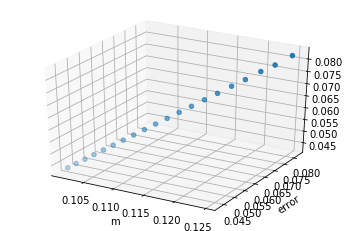

In [107]:
import matplotlib.pyplot as plt

from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')

xline = m_list
yline = error_list
zline = c_list

plt.xlabel('m')
plt.ylabel('error')

ax.scatter3D(xline, yline, zline, 'gray')

In [6]:
import numpy as np
import pandas as pd
df = pd.read_csv('Big market sales data.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [10]:
df.corr()['Item_Weight']

Item_Weight                  1.000000
Item_Visibility             -0.014048
Item_MRP                     0.027141
Outlet_Establishment_Year   -0.011588
Item_Outlet_Sales            0.014123
Name: Item_Weight, dtype: float64